<a href="https://colab.research.google.com/github/Subhraj07/Machine_Learning_Models/blob/master/MLpractice/CEREBRINOCS/pan_cf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !mkdir "/content/datasets/sample"
# !cp -r "/content/drive/My Drive/DL_AI/Document_verification/Datasets/pan" "/content/pan"
# !rm -r "/content/pan"
# !cp -r "/content/pan" "/content/pan_cf"

In [0]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import gc

In [31]:
train_dir = '/content/datasets/train'
test_dir = '/content/datasets/test'

train_pans = [str(train_dir) + "/{}".format(i) for i in os.listdir(train_dir) if 'pan' in i]
train_notpan = [str(train_dir) + "/{}".format(i) for i in os.listdir(train_dir) if 'pan' not in i]

test_imgs = [str(test_dir) + "/{}".format(i) for i in os.listdir(test_dir)]
train_imgs = train_pans + train_notpan
random.shuffle(train_imgs)

del train_pans
del train_notpan
gc.collect()

229

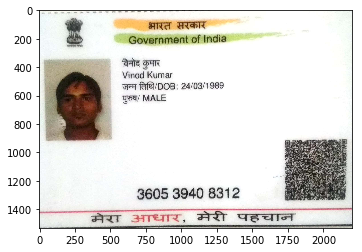

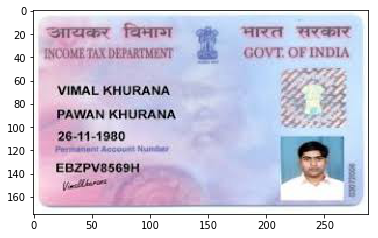

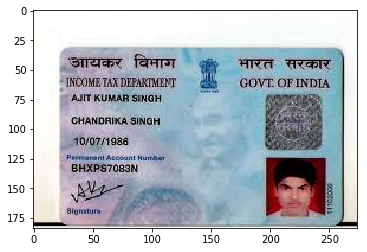

In [32]:
import matplotlib.image as mpimg

for ima in train_imgs[0:3]:
  img = mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
nrows = 150
ncolumns = 150
channels = 3

In [0]:
def read_process_images(list_of_images):
  """
  Returns two arrays
  X is an array resized images
  y is an array of lebels
  """
  X = []
  y = []
  
  for image in list_of_images:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))
     
    if 'pan' in image:
      y.append(1)
    elif 'pan' not in image:
      y.append(0)
    
  return X,y

In [0]:
X,y = read_process_images(train_imgs)

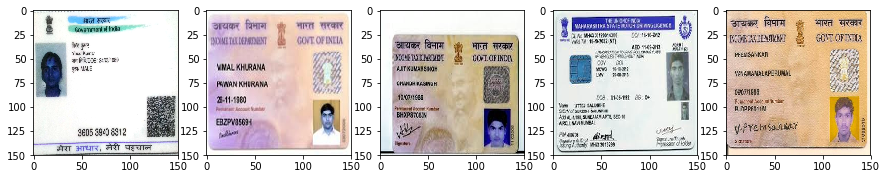

In [36]:
plt.figure(figsize=(15,10))
columns = 5
for i in range(columns):
  plt.subplot(5/columns + 1, columns, i+1)
  plt.imshow(X[i])

Text(0.5, 1.0, 'Labels pan and not pan')

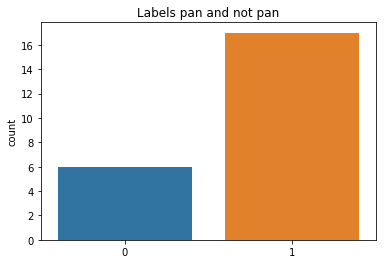

In [37]:
import seaborn as sns
del train_imgs
gc.collect()

X = np.array(X)
y = np.array(y)

sns.countplot(y)
plt.title("Labels pan and not pan")

In [38]:
print(X.shape)
print(y.shape)

(23, 150, 150, 3)
(23,)


In [39]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("shape of train image is", X_train.shape)
print("shape of validation image is", X_val.shape)
print("shape of train label is", y_train.shape)
print("shape of validation label image is", y_val.shape)

shape of train image is (18, 150, 150, 3)
shape of validation image is (5, 150, 150, 3)
shape of train label is (18,)
shape of validation label image is (5,)


In [40]:
del X
del y
gc.collect()

10

In [0]:
n_train = len(X_train)
n_val = len(X_val)

# batch size should be factor of 2 : 2 , 4, 8, 16, 32, 64
batch_size = 4

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
train_Datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_Datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = train_Datagen.flow(X_val, y_val, batch_size=batch_size)

In [62]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = n_train // batch_size,
                              epochs = 128,
                              validation_data = val_generator,
                              validation_steps = n_val // batch_size)

Epoch 1/128
4/4 [==============================] - 1s 297ms/step - loss: 0.2601 - acc: 0.8714 - val_loss: 0.0269 - val_acc: 1.0000
Epoch 2/128
4/4 [==============================] - 1s 241ms/step - loss: 0.1830 - acc: 0.9357 - val_loss: 0.5173 - val_acc: 0.7500
Epoch 3/128
4/4 [==============================] - 1s 259ms/step - loss: 0.3967 - acc: 0.8125 - val_loss: 3.1584e-04 - val_acc: 1.0000
Epoch 4/128
4/4 [==============================] - 1s 250ms/step - loss: 0.0571 - acc: 1.0000 - val_loss: 0.0631 - val_acc: 1.0000
Epoch 5/128
4/4 [==============================] - 1s 239ms/step - loss: 0.0989 - acc: 1.0000 - val_loss: 1.2518e-04 - val_acc: 1.0000
Epoch 6/128
4/4 [==============================] - 1s 256ms/step - loss: 0.2199 - acc: 0.8071 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 7/128
4/4 [==============================] - 1s 239ms/step - loss: 0.1213 - acc: 0.8857 - val_loss: 5.6520 - val_acc: 0.0000e+00
Epoch 8/128
4/4 [==============================] - 1s 270ms/step - loss

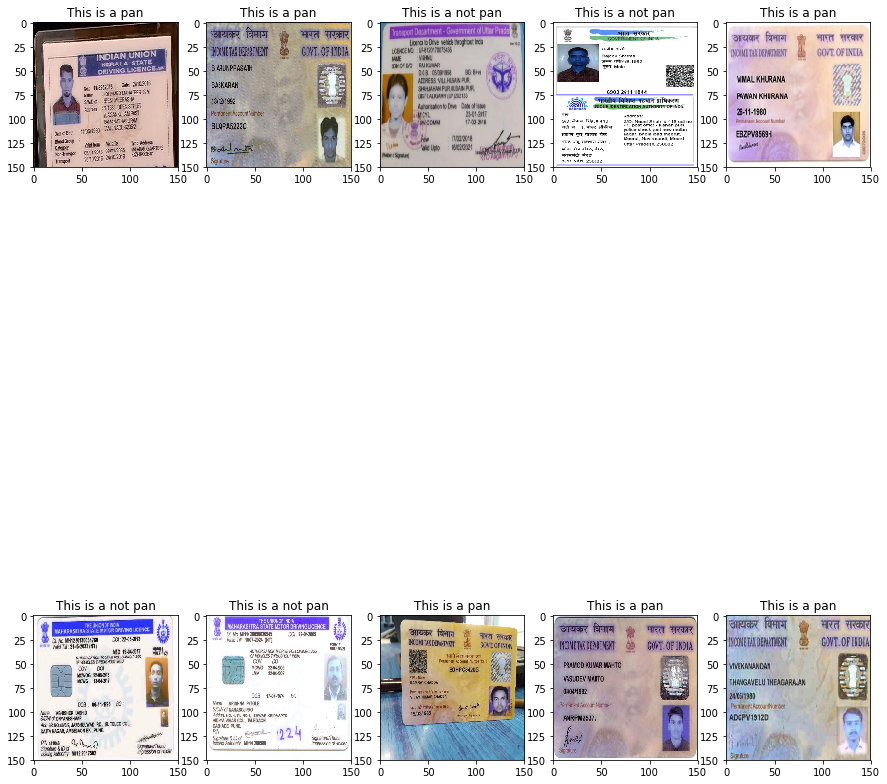

In [63]:
X_test, y_test = read_process_images(test_imgs[:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

i = 0
text_labels = []
plt.figure(figsize=(15,20))

for batch in test_datagen.flow(x, batch_size=1):
  pred = model.predict(batch)
  if pred>0.5:
    text_labels.append('pan')
  else:
    text_labels.append('not pan')
  plt.subplot(5/columns + 1, columns, i+1)
  plt.title("This is a " + text_labels[i])
  imgplot = plt.imshow(batch[0])
  i +=1
  if i%10 == 0:
    break

plt.show()

In [0]:
columns = 5
def result(test_img):
  X_test, y_test = read_process_images(test_img)
  x = np.array(X_test)
  test_datagen = ImageDataGenerator(rescale = 1./255)

  i = 0
  text_labels = []
  plt.figure(figsize=(15,20))

  for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred>0.5:
      text_labels.append('pan')
    else:
      text_labels.append('not a pan')
    plt.subplot(5/columns + 1, columns, i+1)
    plt.title("This is " + text_labels[i] + "\nmatched " + str(pred))
    imgplot = plt.imshow(batch[0])
    i +=1
    if i%len(test_img) == 0:
      break

  plt.show()

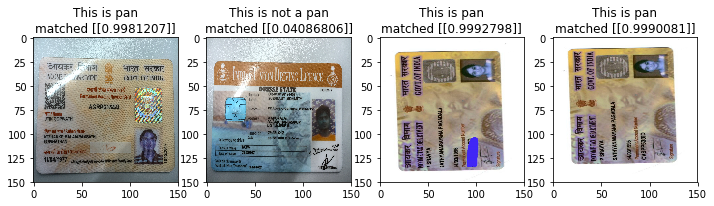

In [100]:
test_dir = '/content/datasets/sample'
test_imgs = [str(test_dir) + "/{}".format(i) for i in os.listdir(test_dir)]
result(test_imgs)

In [0]:
# #Save the model
# model.save_weights('model_wieghts.h5')
# model.save('model_keras.h5')

In [0]:
from keras.models import load_model

lmodel = load_model('/content/model_keras.h5')

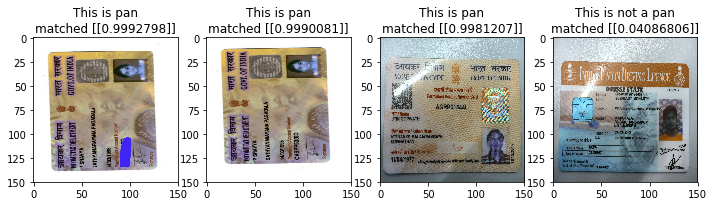

In [102]:
columns = 5
def result(test_img):
  X_test, y_test = read_process_images(test_img)
  x = np.array(X_test)
  test_datagen = ImageDataGenerator(rescale = 1./255)

  i = 0
  text_labels = []
  plt.figure(figsize=(15,20))

  for batch in test_datagen.flow(x, batch_size=1):
    pred = lmodel.predict(batch)
    if pred>0.5:
      text_labels.append('pan')
    else:
      text_labels.append('not a pan')
    plt.subplot(5/columns + 1, columns, i+1)
    plt.title("This is " + text_labels[i] + "\nmatched " + str(pred))
    imgplot = plt.imshow(batch[0])
    i +=1
    if i%len(test_img) == 0:
      break

  plt.show()
  
test_dir = '/content/datasets/sample'
test_imgs = [str(test_dir) + "/{}".format(i) for i in os.listdir(test_dir)]
result(test_imgs)